In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fairlib.src.dataloaders import BT
import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")


In [214]:
y=[ 1, 1, 1, 1 , 0, 0, 0, 0]
p=[1 , 0 , 0 ,0 ,1,1,0,0]

In [12]:
BT.get_weights("EO", y, p)

array([4.        , 2.33333333, 2.33333333, 2.33333333, 2.        ,
       2.        , 2.        , 2.        ])

In [24]:
yn = []
pn = []
for x in y :
    yn.append((x+1)%2)
for x in p :
    pn.append((x+1)%2)

In [25]:
BT.get_weights("EO", yn, pn)

array([4.        , 2.33333333, 2.33333333, 2.33333333, 2.        ,
       2.        , 2.        , 2.        ])

In [50]:
y= 32*[0] + 8 * [0] + 24 * [1] + 36 * [1]
p=32*[0] +  8 * [1] + 24 * [0] + 36 * [1]
a=BT.get_weights("EO", y, p)

In [30]:
1.25+1.15625+2.5+1.069

5.97525

In [43]:
32*1.25/1.562
8*1.15625/1.562
24*2.5/1.562

38.41229193341869

In [53]:
import numpy 
numpy.linalg.norm(a)

15.870378811203944

In [215]:
yr=[]
pr=[]
ind = BT.get_sampled_indices("EO", y, p, "Downsampling")
d={'0-0':0, '0-1':0 ,'1-0':0, '1-1':0}
for i in ind:
    
     now="-".join([str(y[i]), str(p[i])])
     d[now]+=1
     yr.append(str(y[i]))
     pr.append(str(p[i]))
dfds = pd.DataFrame({'Target' : yr, 'Protected' : pr})

get_sampled_indices EO [1, 1, 1, 1, 0, 0, 0, 0] pl: [1, 0, 0, 0, 1, 1, 0, 0] method: Downsampling total 8
{0, 1} {0, 1}


In [127]:
yr=[]
pr=[]
ind = BT.get_sampled_indices("EO", y, p, "Resampling")
d={'0-0':0, '0-1':0 ,'1-0':0, '1-1':0}
for i in ind:
    
     now="-".join([str(y[i]), str(p[i])])
     d[now]+=1
     yr.append(str(y[i]))
     pr.append(str(p[i]))
dfrs = pd.DataFrame({'Target' : yr, 'Protected' : pr})

get_sampled_indices EO [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] pl: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] method: Resampling total 100
{0, 1} {0, 1}
here5
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [32, 33, 34, 35, 36, 37, 38, 39]]
here6
here5
[[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,

In [128]:
#plt.stack ( x='Target' )
dfo = pd.DataFrame({'Target' : y, 'Protected' : p})
dfo.Target=dfo.Target.astype("category")
dfo.Protected=dfo.Protected.astype("string")


In [131]:
dfo

,Target,Protected
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,1
96,1,1
97,1,1
98,1,1


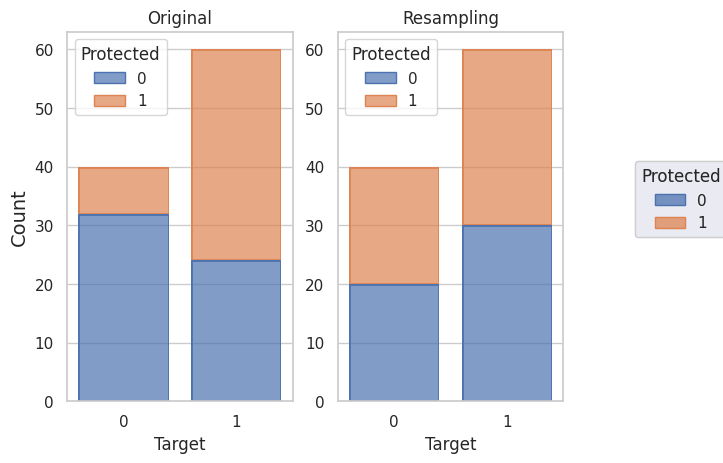

In [220]:
from seaborn import objects as so
so.Plot.config.theme.update({"style": "whitegrid"})
f, (ax1, ax2) = plt.subplots(1,2)
#f.set(xlabel='Frequency')
ax1.set_ylabel("Value", fontsize=14)
p = so.Plot(dfo, x="Target", color="Protected").add(so.Bar(), so.Count(), so.Stack()).label(title="Original", y="Count").on(ax1).plot()
p = so.Plot(dfrs, x="Target", color="Protected").add(so.Bar(), so.Count(), so.Stack()).label(title="Resampling").on(ax2).plot()
#p = so.Plot(dfds, x="Target", color="Protected").add(so.Bar(), so.Count(), so.Stack()).label(title="Downsampling").on(ax3).plot()
ax1.legend(legend.legend_handles, [t.get_text() for t in legend.texts], title="Protected")
ax2.legend(legend.legend_handles, [t.get_text() for t in legend.texts], title="Protected")
#ax3.legend(legend.legend_handles, [t.get_text() for t in legend.texts], title="Protected")
#sns.move_legend(f, "upper left")
#p.theme({"style": "whitegrid"})
#plt.legend()
#display(p)
#p.Save("/home/user/fairlibcode/plots/bteo.png")
#ax = plt.gca()
#ax.set_title("Original")
#p.save(f"/home/user/fairlibcode/plots/bteo_original.png".replace(' ','_').lower() )
#legend = f.legends.pop(0)
#ax1.legend
#print(legend.parent)
#legend.draw(f.canvas.get_renderer())
#display(p)

#sns.move_legend(f, "upper left", bbox_to_anchor=(1, 1))

#ax1.legend(legend.legend_handles, [t.get_text() for t in legend.texts])

#so.Plot(dfrs, x="Target", color="Protected").add(so.Bar(), so.Count(), so.Stack()).label(title="Resampling")
plt.savefig(f"/home/user/fairlibcode/plots/bteo.png".replace(' ','_').lower() )

plt.show()
